In [42]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False  # 그래프에서 한글 출력을 위한 코드
plt.rcParams['font.family'] = 'Malgun Gothic'  # 그래프에서 한글 출력을 위한 코드

- 상관관계 분석

In [43]:
df = pd.read_csv('서울시_데이터.csv')
df.set_index(['구별'], inplace=True)
df

,CCTV댓수,최근증가율(%),인구수,외국인,고령자,외국인비율(%),고령자비율(%)
구별,,,,,,,
종로구,1772,488.10,155106,9077,27605,5.85,17.80
중구,2333,126.61,132259,9243,23980,6.99,18.13
용산구,2383,127.17,240665,14287,38884,5.94,16.16
성동구,3602,216.80,295767,6605,45591,2.23,15.41
광진구,2588,89.05,355306,12825,50815,3.61,14.30
동대문구,2497,286.96,352259,14219,61262,4.04,17.39
중랑구,3296,52.34,394679,4707,70172,1.19,17.78
성북구,3958,105.79,443206,9548,73568,2.15,16.60
강북구,2462,22.37,306093,3448,63383,1.13,20.71


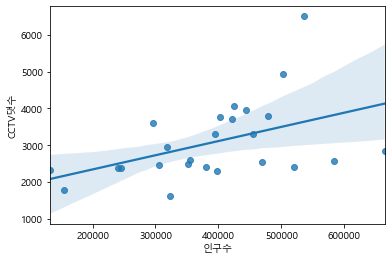

In [44]:
# CCTV 댓수 vs. 인구수
sns.regplot(x='인구수', y='CCTV댓수', data=df)
plt.show()

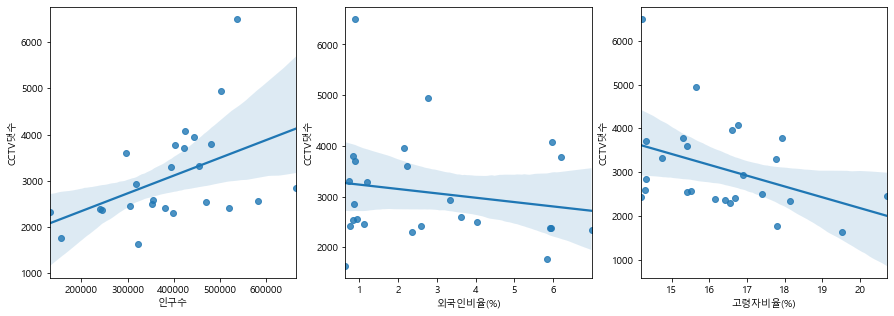

In [45]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
features = ['인구수', '외국인비율(%)', '고령자비율(%)']
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='CCTV댓수', data=df, ax=axs[i])

In [46]:
for i, feature in enumerate(features):
    print(i, feature)

0 인구수
1 외국인비율(%)
2 고령자비율(%)


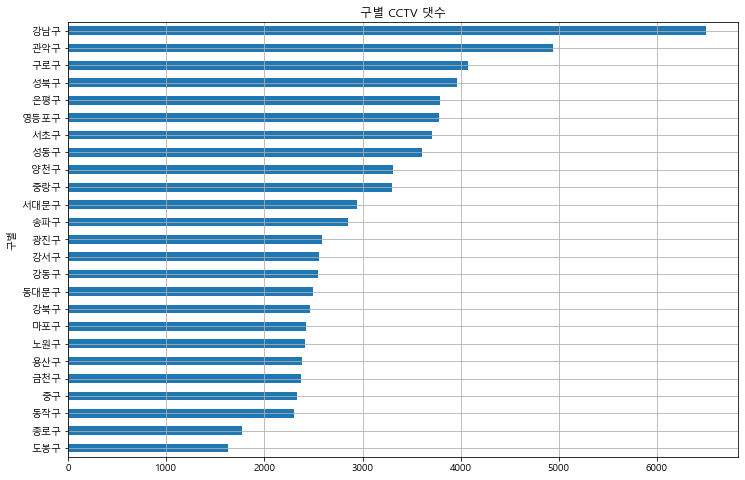

In [47]:
# 구별 CCTV 댓수  
df.CCTV댓수.sort_values().plot(kind='barh', grid=True, figsize=(12,8),  
                               title='구별 CCTV 댓수') 
plt.show() 


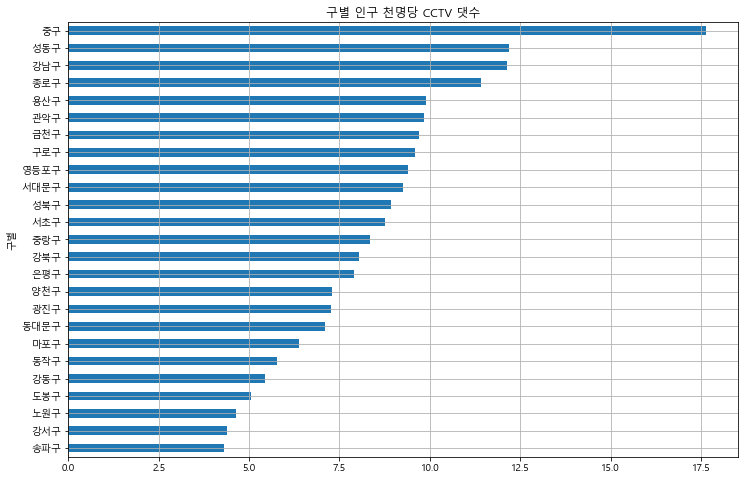

In [48]:
# 인구 천명당 CCTV 댓수
df['천명당CCTV'] = (df.CCTV댓수 / df.인구수 * 1000).round(2)  
df.천명당CCTV.sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 인구 천명당 CCTV 댓수')  
plt.show() 

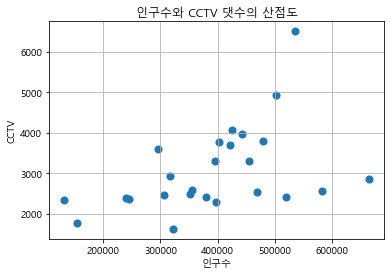

In [49]:
# 산점도 
plt.scatter(df.인구수, df.CCTV댓수, s=50)  
plt.grid(True) 
plt.title('인구수와 CCTV 댓수의 산점도') 
plt.xlabel('인구수') 
plt.ylabel('CCTV') 
plt.show()

- 회귀선

In [50]:
# 산점도 위에 상관관계를 나타내는 선 
# fp1 = np.polyfit(df.인구수, df.CCTV댓수, 1) # 1은 함수의 차수 
# fx = np.array([100000, 700000]) 
# f1 = np.poly1d(fp1)    # 1차원의 회귀식 
# fy = f1(fx)

weight, bias = np.polyfit(df.인구수, df.CCTV댓수, 1)
weight, bias
xs = np.array([100000, 700000])
ys = weight * xs + bias
ys

array([1957.43490106, 4268.1534916 ])

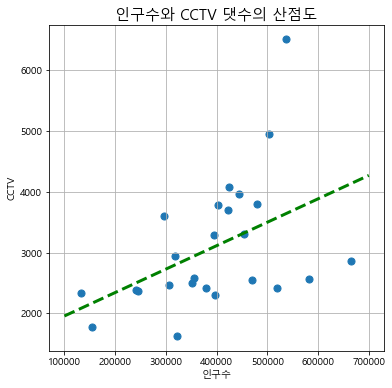

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(df.인구수, df.CCTV댓수, s=50)  
plt.plot(xs, ys, 'g--', lw=3)
plt.grid() 
plt.title('인구수와 CCTV 댓수의 산점도', fontsize=15) 
plt.xlabel('인구수') 
plt.ylabel('CCTV') 
plt.show()

- 회귀선과 산점도 사이의 오차

In [63]:
# 오차를 계산하고, 오차의 내림차순으로 소팅된 데이터프레임 만들기 
# df['오차'] = np.abs(df.CCTV댓수 - f1(df.인구수)).round(2) 
# df_sort = df.sort_values('오차', ascending=False) 

df['오차'] = np.abs(df.CCTV댓수 - (df.인구수 * weight + bias)).round(2) 
df_sort = df.sort_values(by='오차', ascending=False) 
df_sort.head(10)

,CCTV댓수,최근증가율(%),인구수,외국인,고령자,외국인비율(%),고령자비율(%),천명당CCTV,오차
구별,,,,,,,,,
강남구,6502,162.24,536107,4732,76184,0.88,14.21,12.13,2865.03
관악구,4942,200.37,502698,13898,78647,2.76,15.64,9.83,1433.70
송파구,2854,49.21,664341,5671,95164,0.85,14.32,4.30,1276.82
강서구,2560,127.33,582995,5476,90404,0.94,15.51,4.39,1257.54
도봉구,1629,120.75,322419,2054,62894,0.64,19.51,5.05,1185.01
노원구,2415,150.65,520005,4008,86697,0.77,16.67,4.64,1159.96
성동구,3602,216.80,295767,6605,45591,2.23,15.41,12.18,890.63
구로구,4075,204.79,424582,25316,71186,5.96,16.77,9.60,867.54
강동구,2547,89.09,469094,3885,72275,0.83,15.41,5.43,831.89


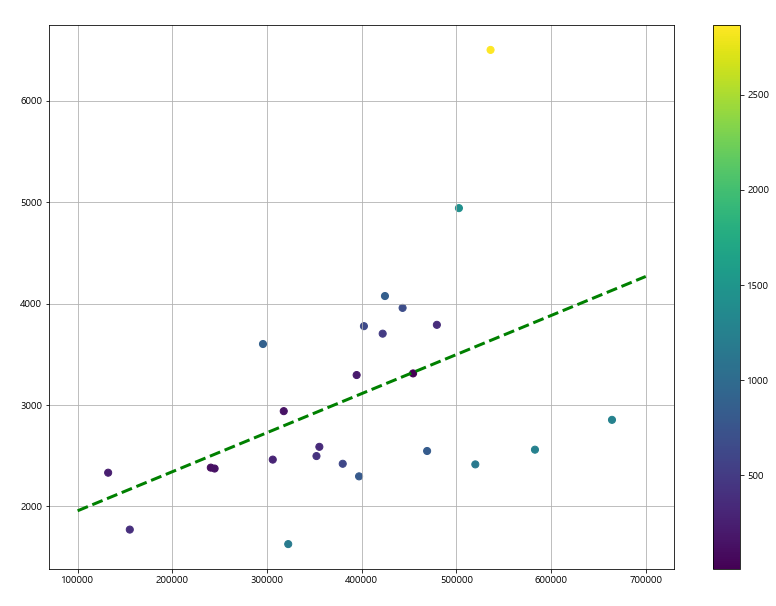

In [68]:
plt.figure(figsize=(14,10)) 
plt.scatter(df.인구수, df.CCTV댓수, c=df.오차, s=50) 
plt.plot(xs, ys, 'g--', lw=3, ls='dashed',color='g') 
plt.colorbar()
plt.grid(True) 
plt.title('인구수와 CCTV 댓수의 관계', fontsize=15, color='w') 
plt.xlabel('인구수', color='w') 
plt.ylabel('CCTV', color='w') 

plt.show() 

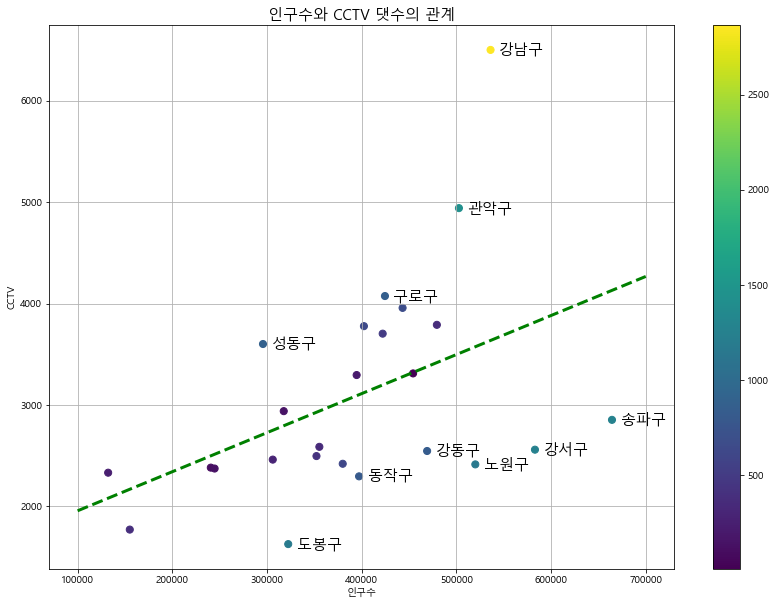

In [76]:
plt.figure(figsize=(14,10)) 
plt.scatter(df.인구수, df.CCTV댓수, c=df.오차, s=50) 
plt.plot(xs, ys, 'g--', lw=3, ls='dashed',color='g') 
plt.colorbar() 
# 스캐터에 문자 표시
for i in range(10):  
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50, 
             df_sort.index[i], fontsize=15) 
 
plt.grid(True) 
plt.title('인구수와 CCTV 댓수의 관계', fontsize=15) 
plt.xlabel('인구수') 
plt.ylabel('CCTV') 
# plt.show()
plt.savefig('서울시_인구수와_CCTV댓수의_관계.png')